# Students Test Score Analysis

Data dictionary:

The following are the column descriptions.

1. Gender: gender of the student (male/female)
2. EthnicGroup: ethnic group of the student (group A to E)
3. ParentEduc: parent(s) education background
4. LunchType: school luch type (standard or free/reduced)
5. TestPrep: test preparation course (completed or none)
6. ParentMaritalStatus: parent(s) marital status
7. PracticeSport: how often the student parctice sport
8. IsFirstChild: if the child is first child in the family or not
9. NrSiblings : Number of siblings the student has
10. TransportMeans: Means of transport to school
11. WklyStudyHours: Weekly self-study hours
12. MathScore: math test score
13. ReadingScore: reading test score
14. WritingScore writing test score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

#### Reading the CSV file

In [3]:
df = pd.read_csv("student_scores.csv")

In [4]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


#### dropping unwanted column

In [7]:
df = df.drop("Unnamed: 0", axis=1)

In [8]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


##### Checking for duplicate values

In [9]:
# Checking for duplicate values

df.duplicated().sum()

0

In [10]:
df.dtypes

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

##### Datatype Conversion

In [11]:
# "NrSiblings" column has wrong datatype of float64. Need to convert to int.

df["NrSiblings"] = df["NrSiblings"].astype(pd.Int64Dtype())

df.dtypes

Gender                 object
EthnicGroup            object
ParentEduc             object
LunchType              object
TestPrep               object
ParentMaritalStatus    object
PracticeSport          object
IsFirstChild           object
NrSiblings              Int64
TransportMeans         object
WklyStudyHours         object
MathScore               int64
ReadingScore            int64
WritingScore            int64
dtype: object

##### Checking missing values

In [12]:
import missingno as msno

<Axes: >

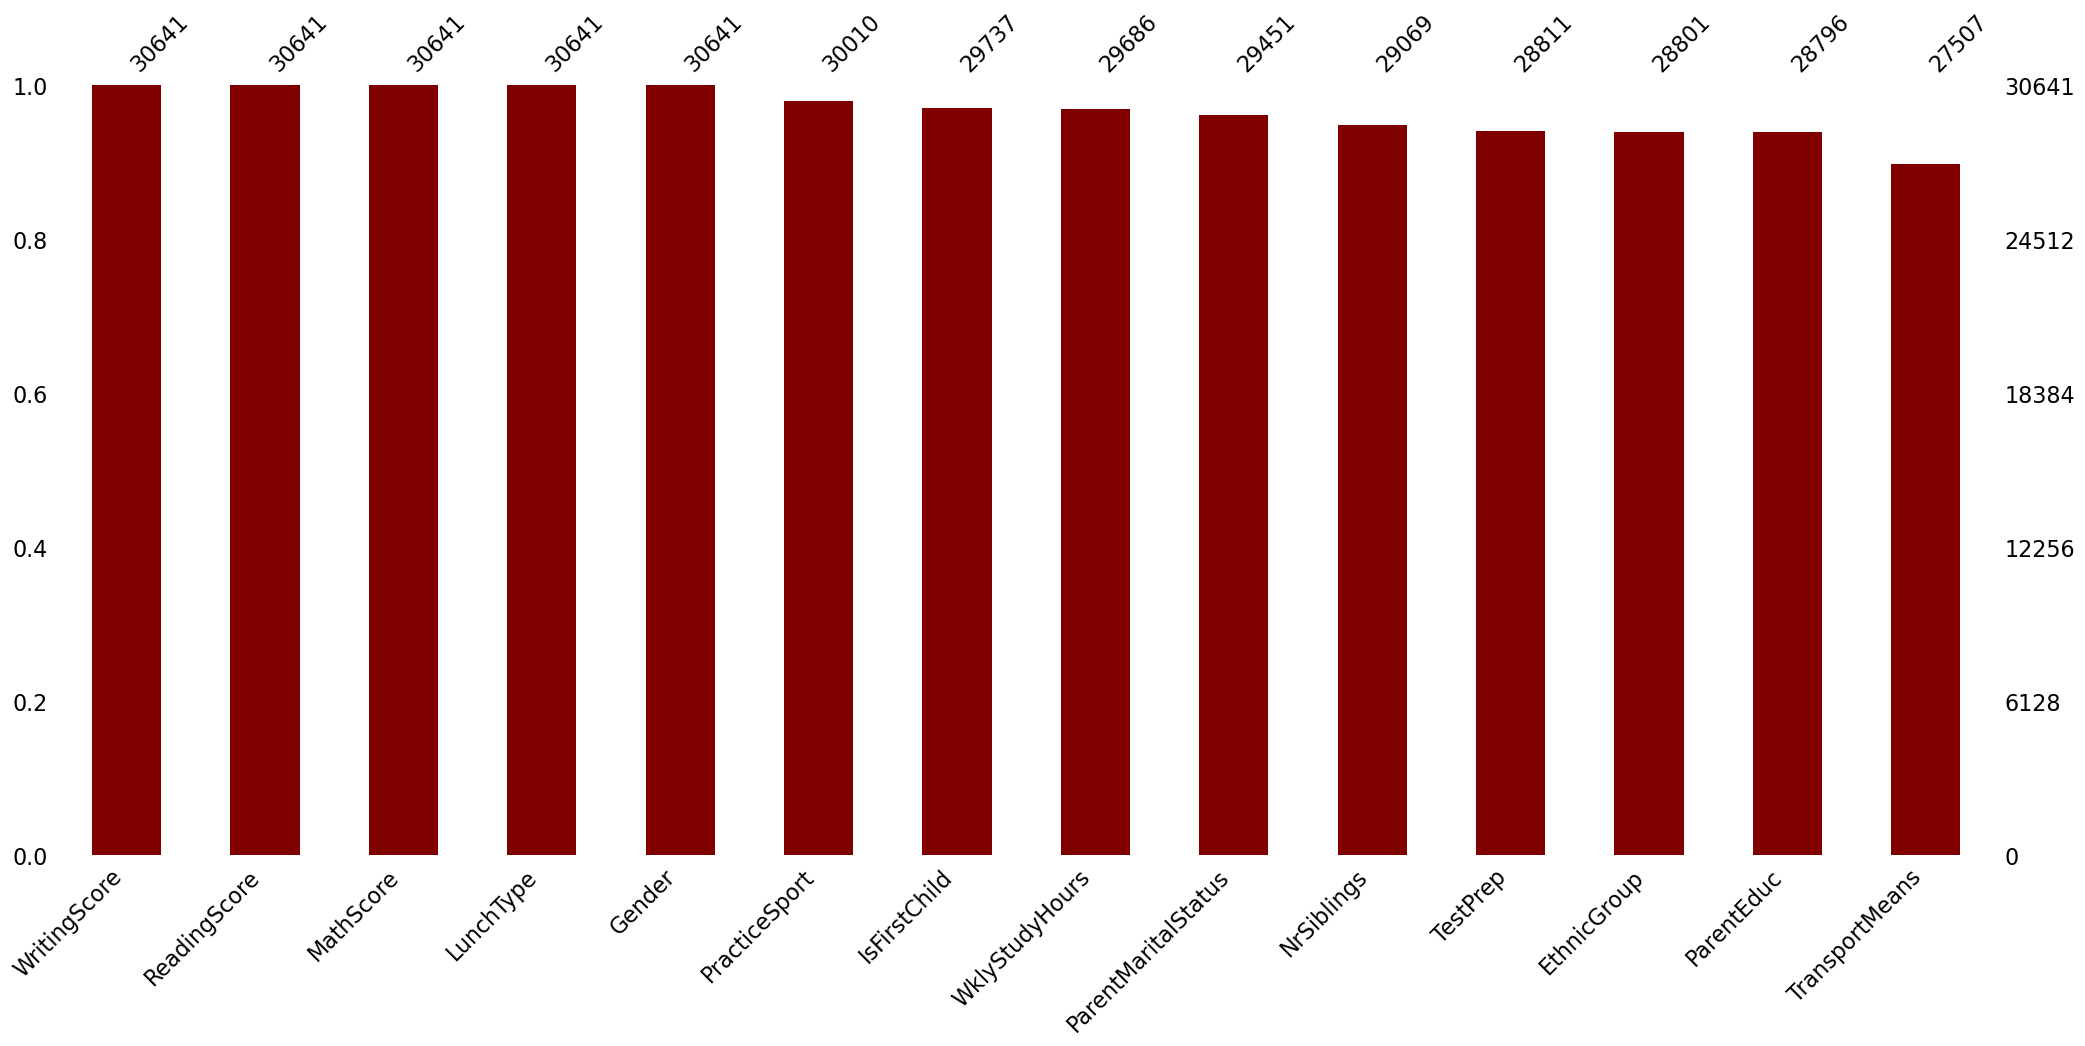

In [13]:
msno.bar(df, color = "maroon", sort="descending")

In [14]:
# from the above it is clearly visible that the data has a lot of missing values.

df.isnull().sum().sort_values()

Gender                    0
LunchType                 0
MathScore                 0
ReadingScore              0
WritingScore              0
PracticeSport           631
IsFirstChild            904
WklyStudyHours          955
ParentMaritalStatus    1190
NrSiblings             1572
TestPrep               1830
EthnicGroup            1840
ParentEduc             1845
TransportMeans         3134
dtype: int64

In [15]:
for col in df:
    print("Missing values in column '{}' is {} %".format(col, np.round(df[col].isnull().sum()*100/len(df[col]),1)))

Missing values in column 'Gender' is 0.0 %
Missing values in column 'EthnicGroup' is 6.0 %
Missing values in column 'ParentEduc' is 6.0 %
Missing values in column 'LunchType' is 0.0 %
Missing values in column 'TestPrep' is 6.0 %
Missing values in column 'ParentMaritalStatus' is 3.9 %
Missing values in column 'PracticeSport' is 2.1 %
Missing values in column 'IsFirstChild' is 3.0 %
Missing values in column 'NrSiblings' is 5.1 %
Missing values in column 'TransportMeans' is 10.2 %
Missing values in column 'WklyStudyHours' is 3.1 %
Missing values in column 'MathScore' is 0.0 %
Missing values in column 'ReadingScore' is 0.0 %
Missing values in column 'WritingScore' is 0.0 %


##### Imputing null values

In [16]:
# There are several available option to fill the null values.
# Here we use the most frequent values in each column to fill the na's.

df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))
null_val = df.isna().sum().sum()


In [17]:
null_val

0

In [18]:
# We have imputed all the missing values in the data.

##### Test Score Distribution

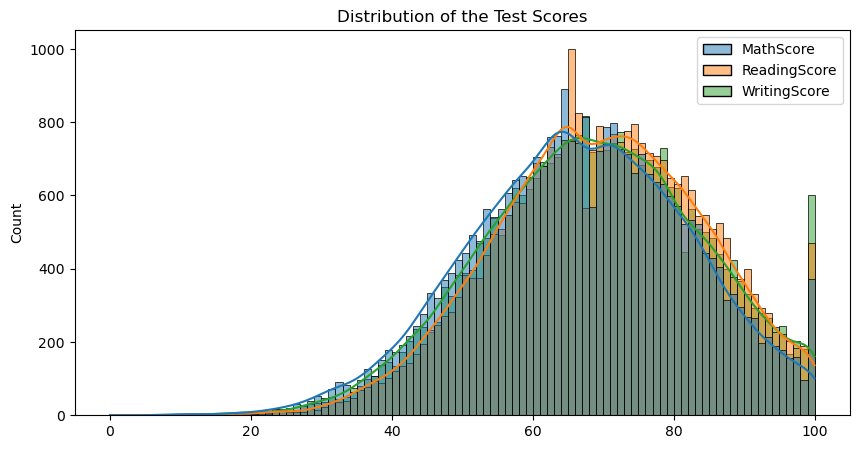

In [20]:
fig, ax = plt.subplots(figsize = (10,5))
sns.histplot(df[['MathScore','ReadingScore','WritingScore']], bins=100, kde=True)

plt.title("Distribution of the Test Scores")

plt.show()

In [22]:
'''
    Given a dataFrame and the column name, this function calculates and returns two stats summary dataframes. 
    - A normalized value_counts of the categories in the given columns "col" and 
    - A sorted mean of the three test scores grouped by the categories in column "col"    
'''

def display_stats(df, col):
       
    val_cnt = df[col].value_counts().to_frame(name=col + ' (count)')
    val_cnt_norm = df[col].value_counts(normalize=True).mul(100).to_frame(name=col + ' (%)')
    
    val_cnt_table = pd.concat([val_cnt, val_cnt_norm], axis=1)
    
    mean_score_summary = df.groupby([col])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean).sort_values(by='MathScore', ascending=False)
    
    return display( val_cnt_table, mean_score_summary)

In [23]:
# describing the mean, std, min and max

df[['MathScore','ReadingScore','WritingScore']].agg([np.mean,np.std, np.min, np.max])

,MathScore,ReadingScore,WritingScore
mean,66.558402,69.377533,68.418622
std,15.361616,14.758952,15.443525
amin,0.000000,10.000000,4.000000
amax,100.000000,100.000000,100.000000


##### Gender Distribution of students

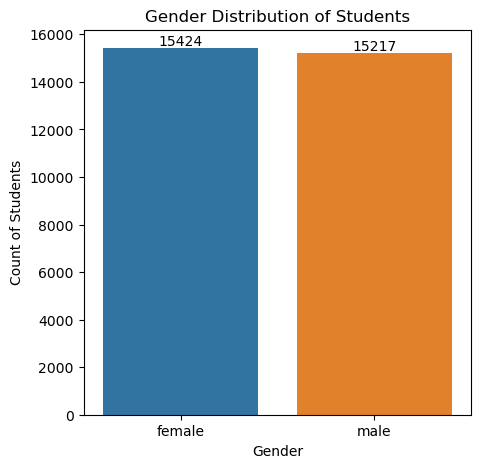

In [24]:
# Gender Distribution of students

plt.figure(figsize = (5,5))

ax = sns.countplot(data=df, x='Gender')
ax.bar_label(ax.containers[0])

plt.ylabel("Count of Students")
plt.title("Gender Distribution of Students")


plt.show()

* From the above chart, we have analysed that the number of female students are more than the number of male students.

In [25]:
gender_gb = df.groupby(df['Gender'])[['MathScore','ReadingScore','WritingScore']].agg(np.mean)

In [26]:
gender_gb

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.080654,72.853216,72.856457
male,69.069856,65.854571,63.920418


Observations

* From the above table we have concluded that Female students are performing good in Reading and Writing compared to Male students.
* While Male students performs good in Maths.

##### Parent(s) Educational background

In [27]:
df['ParentEduc'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [28]:
df['ParentEduc'].value_counts()

some college          8478
high school           5687
associate's degree    5550
some high school      5517
bachelor's degree     3386
master's degree       2023
Name: ParentEduc, dtype: int64

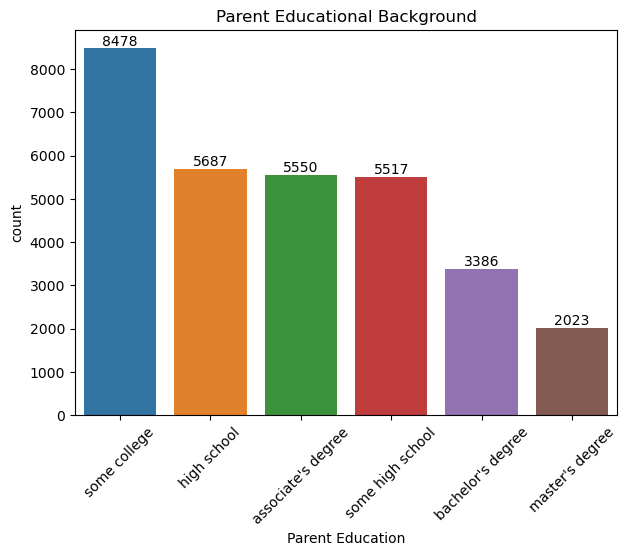

In [30]:
plt.figure(figsize=(7,5))

ax = sns.countplot(df, x='ParentEduc',
              order = ['some college', 'high school', "associate's degree", 'some high school', "bachelor's degree", "master's degree"])


ax.bar_label(ax.containers[0])
plt.xlabel("Parent Education")
plt.title("Parent Educational Background")
plt.xticks(rotation = 45)

plt.show()

In [31]:
educ_gb = df.groupby(df['ParentEduc']).agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"}).sort_values(by='MathScore', ascending=False)
educ_gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
master's degree,72.336134,75.832921,76.356896
bachelor's degree,70.466627,73.062020,73.331069
associate's degree,68.365586,71.124324,70.299099
some college,66.445978,69.189667,68.456711
high school,64.435731,67.213997,65.421136
some high school,62.584013,65.510785,63.632409


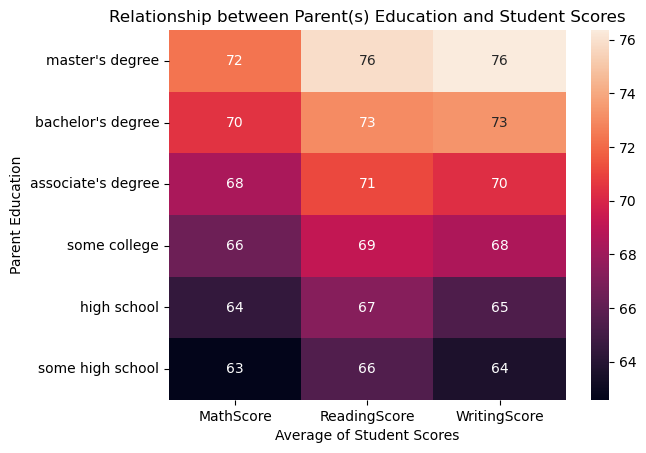

In [32]:

sns.heatmap(educ_gb, annot=True)

plt.title("Relationship between Parent(s) Education and Student Scores")

plt.xlabel("Average of Student Scores")
plt.ylabel("Parent Education")

plt.show()

Observations from the above chart and Table.

* There are six categories of educational background of parent(s) of the students, 
ranging from master's education (the highest level) to highschool dropouts (some high school).

* In terms of distribution, master's degree holder parent(s) are the least at 7% and parent(s) with some college are the most at 23%.

* When it comes to the students' test scores, there seems to be a clear correlation with their parents(s) educational background. Children of highly educated parents score better than the children of less educated parents. 

* This pattern is seen consistently with all three test subjects.

##### Ethnic Group

In [33]:
df['EthnicGroup'].unique()

array(['group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

In [34]:
df['EthnicGroup'].value_counts()

group C    11052
group D     7503
group B     5826
group E     4041
group A     2219
Name: EthnicGroup, dtype: int64

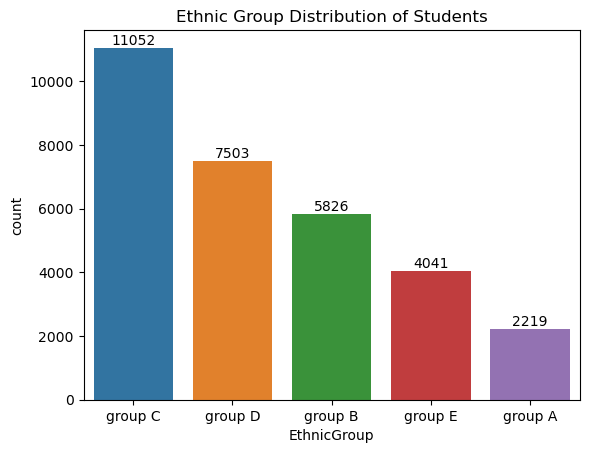

In [35]:

ax = sns.countplot(df, x='EthnicGroup', order = ['group C','group D', 'group B', 'group E', 'group A'])

ax.bar_label(ax.containers[0])

plt.title("Ethnic Group Distribution of Students")

plt.show()

In [36]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()
groupB = df.loc[(df['EthnicGroup'] == "group B")].count()
groupC = df.loc[(df['EthnicGroup'] == "group C")].count()
groupD = df.loc[(df['EthnicGroup'] == "group D")].count()
groupE = df.loc[(df['EthnicGroup'] == "group E")].count()

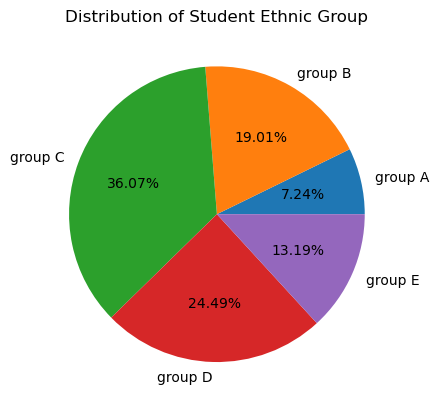

In [37]:

l=["group A","group B","group C","group D","group E"]
mlist = [groupA['EthnicGroup'],groupB['EthnicGroup'],groupC['EthnicGroup'],groupD['EthnicGroup'],groupE['EthnicGroup']]

plt.pie(mlist, labels=l, autopct = "%1.2f%%")
plt.title("Distribution of Student Ethnic Group")


plt.show()

In [38]:
display_stats(df,'EthnicGroup')

,EthnicGroup (count),EthnicGroup (%)
group C,11052,36.069319
group D,7503,24.486799
group B,5826,19.013740
group E,4041,13.188212
group A,2219,7.241931


,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group E,75.298936,74.251423,72.677060
group D,67.666400,70.382247,70.890844
group C,64.943811,68.517734,67.149294
group B,63.490216,67.320460,65.895125
group A,62.991888,66.787742,65.251915


Observation from the above chart and table.

* There are five races/ethnic groups represented in the dataset (anonymized) from group A to group E

* With ~36% of the student population, race group C are the most represented whereas with only ~8% race group A are the least.

* The effect of race on students performance is clear to see. Race group E students are by far the better performers having scored ~8-points more than the second group (D) in math and 4 more points in reading score and close to 2 points in writing test. 

* on the other end of the scoreboard we find race group A, this group scored more than 12-points on math lower than that of group E!

##### Weekly Study Hours

In [41]:
df['WklyStudyHours'].value_counts()

5 - 10    17201
< 5        8238
> 10       5202
Name: WklyStudyHours, dtype: int64

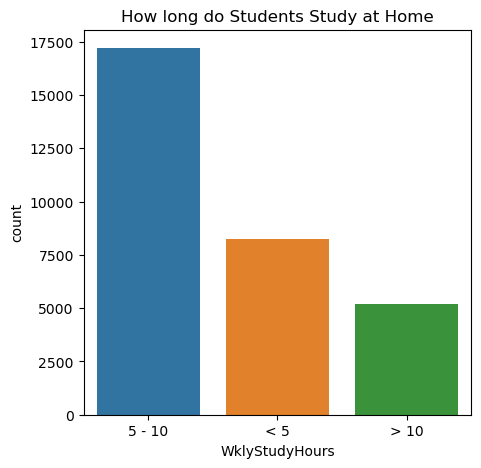

In [47]:
plt.figure(figsize=(5,5))

sns.countplot(df, x='WklyStudyHours', order=['5 - 10','< 5','> 10'])

plt.title("How long do Students Study at Home")
plt.show()


In [48]:
display_stats(df,'WklyStudyHours')

,WklyStudyHours (count),WklyStudyHours (%)
5 - 10,17201,56.137202
< 5,8238,26.885546
> 10,5202,16.977253


,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
> 10,68.696655,70.365436,69.777778
5 - 10,66.859078,69.654148,68.643800
< 5,64.580359,68.176135,67.090192


Observations:

* This feature is a weekly study hours the students had been studying after school. There are three distinct values less than 5hrs a week, between 5 -10hrs per week and more than 10hrs per week.
* More than half (56%) of the students study between 5 - 10 hrs. However, only 17% used to study more than 10 hrs weekly.
* Test score result shows that performance is direclty related to the hours spent studying.

##### Test Prep Scores

In [57]:
df['TestPrep'].value_counts()

none         20686
completed     9955
Name: TestPrep, dtype: int64

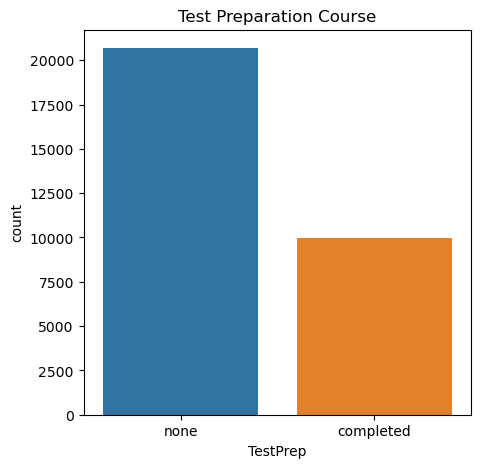

In [61]:
plt.figure(figsize = (5,5))

sns.countplot(df, x='TestPrep')

plt.title("Test Preparation Course")

plt.show()

In [62]:
display_stats(df,'TestPrep')

,TestPrep (count),TestPrep (%)
none,20686,67.510851
completed,9955,32.489149


,MathScore,ReadingScore,WritingScore
TestPrep,,,
completed,69.546660,73.732998,74.703265
none,65.120323,67.281495,65.394180


Observation

* Almost two-third of the student poppulation did not take a test preparation course.
* Logically the above chart and calculation shows that the students who completed the test course, scored good in all three subjects.

##### Parent(s) Marital Status

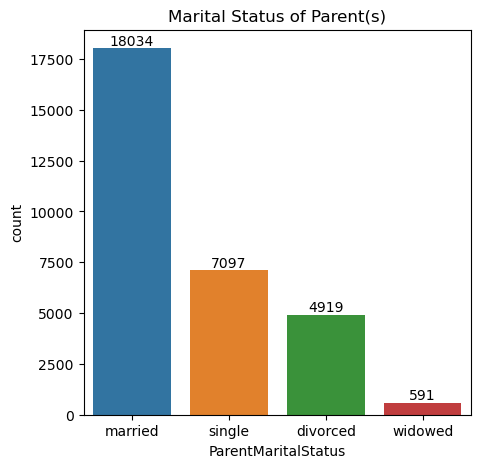

In [68]:
plt.figure(figsize = (5,5))

ax = sns.countplot(df, x= 'ParentMaritalStatus', order = ['married','single','divorced','widowed'])
ax.bar_label(ax.containers[0])

plt.title("Marital Status of Parent(s)")
plt.show()


In [69]:
display_stats(df,'ParentMaritalStatus')

,ParentMaritalStatus (count),ParentMaritalStatus (%)
married,18034,58.855781
single,7097,23.161777
divorced,4919,16.053654
widowed,591,1.928788


,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
widowed,67.368866,69.651438,68.563452
divorced,66.691197,69.655011,68.799146
married,66.650161,69.379561,68.406177
single,66.165704,69.157250,68.174440


Observations

* Parent(s) whose status is married contriuted to a overall of ~59% of total, followed by single at 23% and divorced at 16%.
Whereas widowed contributed to ~2% of total.

* From the data, we can conclude that Parent(s) Marital status doesn't have impact on Students scores.

##### is the Student First Child in the Family

In [71]:
df['IsFirstChild'].value_counts()

yes    19986
no     10655
Name: IsFirstChild, dtype: int64

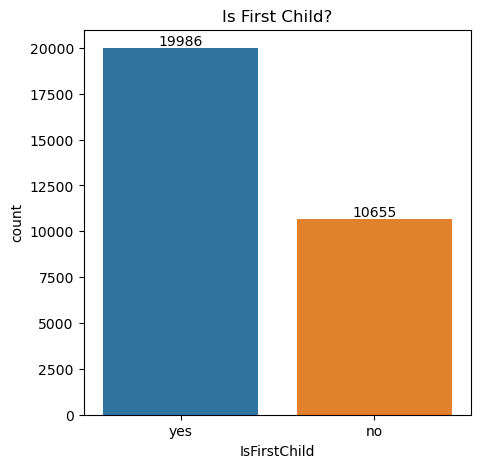

In [72]:
plt.figure(figsize = (5,5))

ax = sns.countplot(df, x= 'IsFirstChild', order = ['yes','no'])
ax.bar_label(ax.containers[0])

plt.title("Is First Child?")
plt.show()


In [73]:
display_stats(df,'IsFirstChild')

,IsFirstChild (count),IsFirstChild (%)
yes,19986,65.226331
no,10655,34.773669


,MathScore,ReadingScore,WritingScore
IsFirstChild,,,
yes,66.724507,69.508106,68.529371
no,66.246832,69.132614,68.210887


Observation

* The above data shows little to no correlation with test scores.

##### Number of Siblings

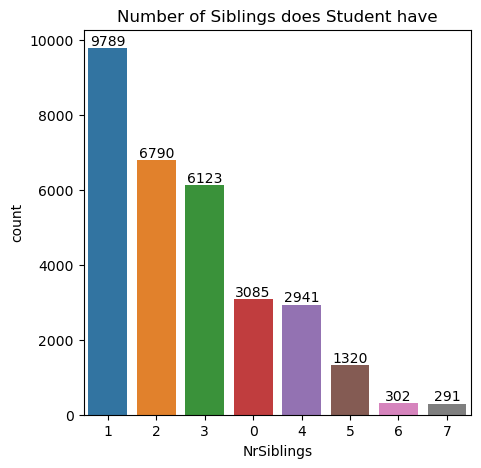

In [77]:
plt.figure(figsize = (5,5))

ax = sns.countplot(df, x= 'NrSiblings', order =[1,2,3,0,4,5,6,7])
ax.bar_label(ax.containers[0])

plt.title("Number of Siblings does Student have")
plt.show()




In [84]:
zero = df.loc[(df['NrSiblings']==0)].count()
one = df.loc[(df['NrSiblings']==1)].count()
two = df.loc[(df['NrSiblings']==2)].count()
three = df.loc[(df['NrSiblings']==3)].count()
four = df.loc[(df['NrSiblings']==4)].count()
five = df.loc[(df['NrSiblings']==5)].count()
six = df.loc[(df['NrSiblings']==6)].count()
seven = df.loc[(df['NrSiblings']==7)].count()

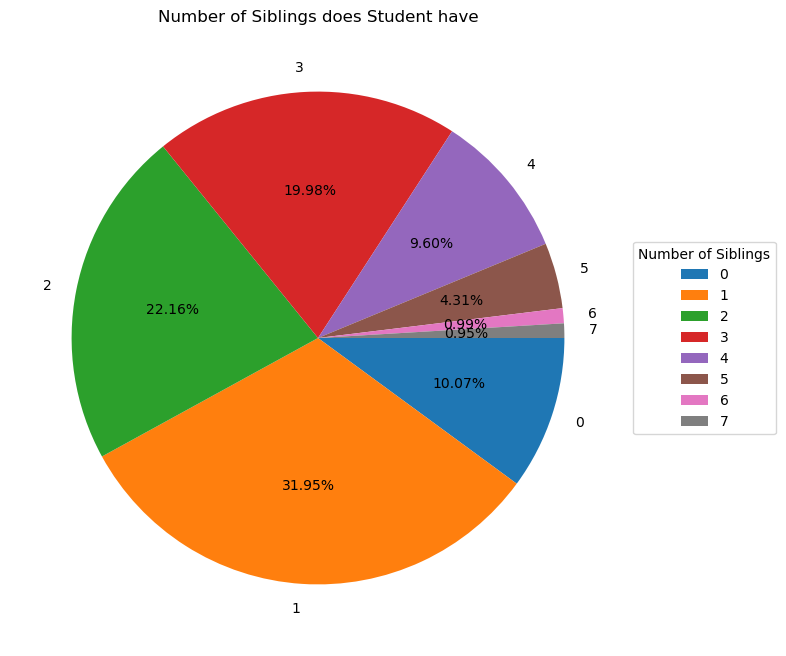

In [118]:
plt.figure(figsize = (8,8))

l=[0,1,2,3,4,5,6,7]

ml=[zero['NrSiblings'], one['NrSiblings'], two['NrSiblings'], three['NrSiblings'], four['NrSiblings'], 
    five['NrSiblings'], six['NrSiblings'], seven['NrSiblings']]

plt.pie(ml, labels=l, autopct='%1.2f%%', counterclock=False)

plt.legend(title="Number of Siblings", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Number of Siblings does Student have")
plt.show()



In [103]:
display_stats(df,'NrSiblings')

,NrSiblings (count),NrSiblings (%)
1,9789,31.947391
2,6790,22.159851
3,6123,19.983029
0,3085,10.068209
4,2941,9.598251
5,1320,4.307953
6,302,0.985608
7,291,0.949708


,MathScore,ReadingScore,WritingScore
NrSiblings,,,
7,67.615120,69.828179,68.986254
0,66.819449,69.547812,68.746515
3,66.719092,69.488159,68.650498
5,66.630303,69.453788,68.282576
2,66.554934,69.472018,68.522533
1,66.450710,69.253346,68.220554
4,66.245495,69.144169,68.073444
6,65.917219,68.801325,67.860927


Observations

* This feature has little to no effect on score. 

##### Means of Transport School

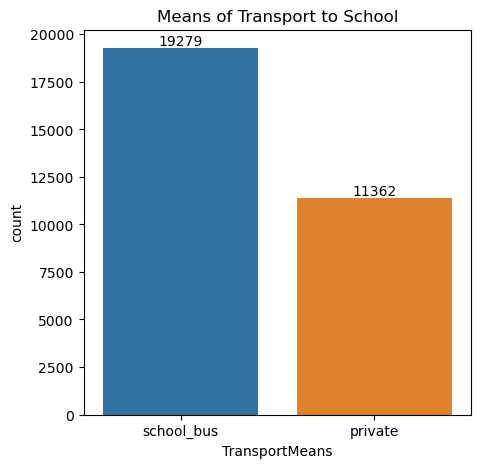

In [105]:
plt.figure(figsize = (5,5))

ax = sns.countplot(df, x= 'TransportMeans')
ax.bar_label(ax.containers[0])

plt.title("Means of Transport to School")
plt.show()



In [106]:
display_stats(df, 'TransportMeans')

,TransportMeans (count),TransportMeans (%)
school_bus,19279,62.918965
private,11362,37.081035


,MathScore,ReadingScore,WritingScore
TransportMeans,,,
school_bus,66.586130,69.321645,68.365009
private,66.511354,69.472364,68.509593


Observations

* The above analysis shows that there is no effect or impact by transport on scores.

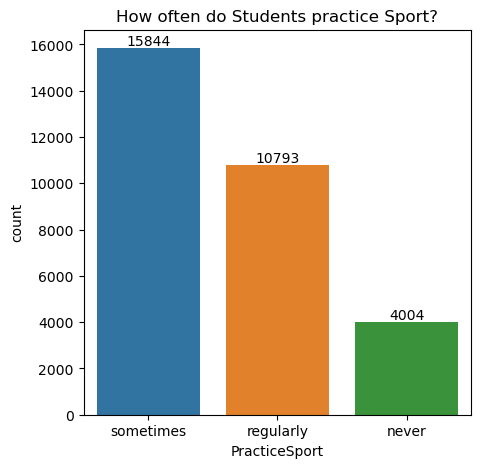

In [109]:
plt.figure(figsize = (5,5))

ax = sns.countplot(df, x= 'PracticeSport', order=['sometimes','regularly','never'])
ax.bar_label(ax.containers[0])

plt.title("How often do Students practice Sport?")
plt.show()

In [110]:
display_stats(df,'PracticeSport')

,PracticeSport (count),PracticeSport (%)
sometimes,15844,51.708495
regularly,10793,35.224046
never,4004,13.067459


,MathScore,ReadingScore,WritingScore
PracticeSport,,,
regularly,67.839155,69.943019,69.604003
sometimes,66.289258,69.255112,68.090255
never,64.171079,68.337662,66.522727


Observations

* from the above analysis we can see that 51% of students attend sports sometimes not regurlarly. Followed by 35% of students attend sports regularly.
* Only 13% of Students never attended the Sports.
* Sports doesn't have a big impact on scores, only 1% difference in MathScore for sometimes and regular, and 2% difference for sometimes and never.

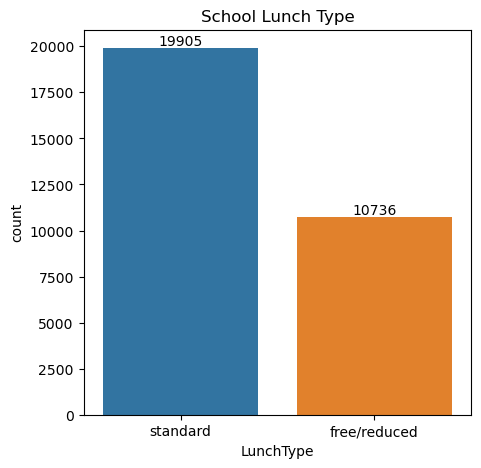

In [113]:
plt.figure(figsize = (5,5))

ax = sns.countplot(df, x= 'LunchType')
ax.bar_label(ax.containers[0])

plt.title("School Lunch Type")
plt.show()

Text(0.5, 1.0, 'Percentage of luch type distribution within each ethnic group')

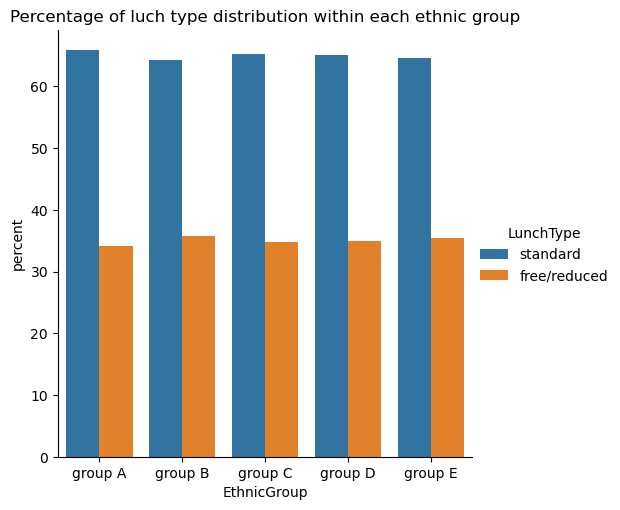

In [117]:
x, y = 'EthnicGroup','LunchType'

df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')


plt.title('Percentage of luch type distribution within each ethnic group')


In [114]:
display_stats(df, 'LunchType')

,LunchType (count),LunchType (%)
standard,19905,64.961979
free/reduced,10736,35.038021


,MathScore,ReadingScore,WritingScore
LunchType,,,
standard,70.709370,72.175634,71.529716
free/reduced,58.862332,64.189735,62.650522


Observations:

* There are 2 types of lunch types Standard and Free/reduced. 
* Standard lunch contributes to 64% of total and free/reduced contributes to 35%
* The ratio of standard to free luch seems failrly consistent between race group.
* It appears that lunch type has a paramount effect on test scores. On math test score the difference between starndard and free lunch is almost 12 points. In wrtiting and reading tests the difference is 8 and 9 respectively.

Interacting features

In the above section we have seen the distribution and effect of individual features on test scores. While some of the features such as lunch type and test preparation course have considerable effect, some other features on the other hand have little to no effect at all. But it is advisable to check the interacting effect with other features before we discard/neglect these features altogether before we make our final conclusions on their usefulness. 

##### Relationship between Gender and Parent Education on scores

In [139]:
df.groupby(['Gender','ParentEduc'])[['MathScore','ReadingScore','WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

##### Relationship between Gender and Ethnic Group on scores

In [138]:
df.groupby(['EthnicGroup','Gender'])[['MathScore','ReadingScore','WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

##### Relationship between Lunch Type and Ethnic Group on scores

In [137]:
df.groupby(['EthnicGroup','LunchType'])[['MathScore','ReadingScore','WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

##### Relationship between Pratice Sport and Test Preparation on scores

In [136]:
df.groupby(['PracticeSport','TestPrep'])[['MathScore','ReadingScore','WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

##### Relationship between Sports Practice and weekly Study hours on scores

In [135]:
df.groupby(['PracticeSport', 'WklyStudyHours'])[['MathScore','ReadingScore','WritingScore']]\
.agg(np.mean).style.background_gradient(cmap='Blues')

##### Relationship between Gender and Students Practice Sports on scores

In [134]:
df.groupby(['Gender', 'PracticeSport'])[['MathScore','ReadingScore','WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

Observations:

Based on the analysis of the data above, we draw the following conclusions:

Gender and Parental Education Level:

On average, females outperform males by approximately:
* 3.19 points in Math
* 4.37 points in Reading
* 5.34 points in Writing
Students with parents holding a master's degree score, on average, approximately:
* 4.98 points higher in Math
* 5.17 points higher in Reading
* 5.63 points higher in Writing compared to those with parents holding a bachelor's degree.

Ethnic Group:

Students from group E score, on average, approximately:
* 7.94 points higher in Math
* 6.14 points higher in Reading
* 6.17 points higher in Writing compared to students from group A.
Across all ethnic groups, females outperform males in Reading and Writing by an average of 4.06 and 3.33 points, respectively. However, males outperform females in Math by an average of 3.60 points.

Lunch Type:

Students on a standard lunch plan score, on average, approximately:
* 11.23 points higher in Math
* 9.41 points higher in Reading
* 8.98 points higher in Writing compared to those on a free/reduced lunch plan.

Test Preparation:

Students who completed test preparation regularly score, on average, approximately:
* 5.42 points higher in Math
* 4.88 points higher in Reading
* 5.92 points higher in Writing compared to those who completed it sometimes or never.

Weekly Study Hours:

For each additional hour of study per week:
* Math scores increase by approximately 1.37 points
* Reading scores increase by approximately 1.32 points
* Writing scores increase by approximately 1.30 points.

Engagement in Sports:

On average, females score approximately:
* 3.25 points higher in Math
* 6.18 points higher in Reading
* 7.12 points higher in Writing compared to males.


##### Relationship between Gender, is first child  and number of siblings on scores

In [133]:
df.groupby(['IsFirstChild', 'Gender', 'NrSiblings'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

##### Relationship between Students practice sports, weekly Study hours and Parent Education on scores

In [132]:
df.groupby(['PracticeSport', 'WklyStudyHours', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

Observations:

Based on the analysis of the above data, we have observed several trends and relationships between different factors and students' academic performance. Let's summarize the findings:

Effect of Being the First Child:

* Generally, being the first child does not show significant differences in academic performance compared to having multiple siblings.
* Females tend to have slightly higher scores than males across different family sizes.
* Scores for both genders tend to decrease as the number of siblings increases.

Impact of Parental Education and Study Habits:

* Students with parents holding higher degrees (bachelor's or master's) tend to have higher scores in Math, Reading, and Writing compared to those with parents holding lower degrees (high school or some high school).
* Regularly studying (5-10 hours per week) tends to correlate with higher scores across different parental education levels, while irregular study habits or lack of study time (<5 hours or >10 hours) show lower scores.

Engagement in Sports and Test Preparation:

* Students who engage in sports regularly or sometimes tend to have higher scores compared to those who never engage in sports.
* Completing test preparation regularly correlates with higher scores compared to irregular or no test preparation.



#### Conclusion:

From the analysis, it's evident that various factors such as parental education, study habits, engagement in extracurricular activities like sports, and test preparation significantly influence students' academic performance. Students with parents holding higher degrees and those who study regularly tend to perform better in Math, Reading, and Writing. Additionally, engaging in sports and completing test preparation regularly are associated with higher academic achievement. These findings underscore the importance of parental involvement, study habits, and extracurricular activities in promoting academic success among students.

This analysis provides valuable insights for educators, policymakers, and parents to develop strategies and interventions aimed at enhancing students' academic performance and overall well-being. Further research and data collection could help in exploring additional factors that may influence academic achievement and tailoring interventions to meet the diverse needs of students.